# Execution Interval Method

In [1]:
import json
import os
import sys
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from collections import defaultdict
from libraries.utils import *
from libraries.exeint import exeInt




## Load Data

In [2]:
############ configuration ################
############################################

CODE = 'lora_ducy'       ### application (code)    theft_protection, mamba2, lora_ducy
BEHAVIOUR_FAULTY = 'faulty_data'            ### normal, faulty_data
BEHAVIOUR_NORMAL = 'normal'            ### normal, faulty_data
THREAD = 'single'           ### single, multi
VER = 3                     ### format of data collection

base_dir = '../trace_data' ### can be replaced with 'csv', 'exe_plot', 'histogram'
normalbase_path = base_dir+f'/{CODE}/{THREAD}_thread/version_{VER}/{BEHAVIOUR_NORMAL}'
faultybase_path = base_dir+f'/{CODE}/{THREAD}_thread/version_{VER}/{BEHAVIOUR_FAULTY}'

print(normalbase_path)
print(faultybase_path)

../trace_data/lora_ducy/single_thread/version_3/normal
../trace_data/lora_ducy/single_thread/version_3/faulty_data


In [3]:

train_base_path = os.path.join(normalbase_path, 'train_data')
train_data_path = [os.path.join(train_base_path, x) for x in os.listdir(train_base_path)]
train_varlist_path = os.listdir(normalbase_path)
train_varlist_path = [os.path.join(normalbase_path, x) for x in train_varlist_path if 'varlist' in x]

######### get paths #######################
paths_log, paths_traces, varlist_path, paths_label = get_paths(faultybase_path)

### remove.Ds_store from all lists
train_data_path = [x for x in train_data_path if '.DS_Store' not in x]
train_varlist_path = [x for x in train_varlist_path if '.DS_Store' not in x]
paths_log = [x for x in paths_log if '.DS_Store' not in x]
paths_traces = [x for x in paths_traces if '.DS_Store' not in x]
varlist_path = [x for x in varlist_path if '.DS_Store' not in x]
paths_label = [x for x in paths_label if '.DS_Store' not in x]

paths_log.sort()
paths_traces.sort()
varlist_path.sort()
paths_label.sort()

# print(paths_log)
# print(paths_traces)
# print(varlist_path)
# print(paths_label)

test_data_path = paths_traces
test_label_path = paths_label

print(train_data_path)
print(test_data_path)
print(test_label_path)


['../trace_data/lora_ducy/single_thread/version_3/normal/train_data/trace_trial1', '../trace_data/lora_ducy/single_thread/version_3/normal/train_data/trace_trial6', '../trace_data/lora_ducy/single_thread/version_3/normal/train_data/trace_trial8', '../trace_data/lora_ducy/single_thread/version_3/normal/train_data/trace_trial9', '../trace_data/lora_ducy/single_thread/version_3/normal/train_data/trace_trial7', '../trace_data/lora_ducy/single_thread/version_3/normal/train_data/trace_trial12', '../trace_data/lora_ducy/single_thread/version_3/normal/train_data/trace_trial5', '../trace_data/lora_ducy/single_thread/version_3/normal/train_data/trace_trial2', '../trace_data/lora_ducy/single_thread/version_3/normal/train_data/trace_trial3', '../trace_data/lora_ducy/single_thread/version_3/normal/train_data/trace_trial11', '../trace_data/lora_ducy/single_thread/version_3/normal/train_data/trace_trial10']
['../trace_data/lora_ducy/single_thread/version_3/faulty_data/trace_trial1', '../trace_data/lo

In [4]:
varlist_path

['../trace_data/lora_ducy/single_thread/version_3/faulty_data/varlist_trial1.json',
 '../trace_data/lora_ducy/single_thread/version_3/faulty_data/varlist_trial2.json',
 '../trace_data/lora_ducy/single_thread/version_3/faulty_data/varlist_trial3.json',
 '../trace_data/lora_ducy/single_thread/version_3/faulty_data/varlist_trial4.json',
 '../trace_data/lora_ducy/single_thread/version_3/faulty_data/varlist_trial5.json',
 '../trace_data/lora_ducy/single_thread/version_3/faulty_data/varlist_trial6.json']

In [5]:
############# check varlist is consistent ############
############# only for version 3 ######################

if VER == 3:
    check_con, _ = is_consistent([train_varlist_path[0]]+ varlist_path) ### compare with train varlist

    if check_con != False:
        to_number = read_json(varlist_path[0])
        from_number = mapint2var(to_number)
    else:
        ### load normal varlist
        print('loading normal varlist')
        to_number = read_json(train_varlist_path[0])
        from_number = mapint2var(to_number)



varlist 1 is consistent with varlist 0
varlist 2 is consistent with varlist 0
varlist 3 is consistent with varlist 0
varlist 4 is consistent with varlist 0
varlist 5 is consistent with varlist 0
varlist 6 is consistent with varlist 0


In [6]:
# #### key finder ####
# from_number[44]

In [7]:
############ Get variable list ######################
sorted_keys = list(from_number.keys())
sorted_keys.sort()
var_list = [from_number[key] for key in sorted_keys]   ### get the variable list
# print(var_list)

## Confidence Interval

__Confidence Interval:__

A confidence interval is a range around the mean that is likely to contain the true population mean. The formula for a confidence interval is mean ± margin of error mean±margin of error, where the margin of error depends on the desired confidence level and the standard error.

_Example:_

1. Choose a confidence level (e.g., 95%).
2. Calculate the standard error: standard deviation/ sqr_root(number of observations)
3. Calculate the margin of error: critical value × standard error
4. Determine the confidence interval: mean ± margin of error


In [8]:
### initialize exeinz
ei = exeInt()

### Data Processing

In [9]:
### get execution intervals for all variables

exe_list, filewise_exe_list = ei.get_exeint(train_data_path)

../trace_data/lora_ducy/single_thread/version_3/normal/train_data/trace_trial1
../trace_data/lora_ducy/single_thread/version_3/normal/train_data/trace_trial1
dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 77, 78, 79, 74, 80, 75, 81, 82, 83, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 76])
0 44 2219
0 2219 2232
0 2232 21070
0 21070 22073
0 22073 22868
0 22868 41077
0 41077 42079
0 42079 44186
0 44186 61088
0 61088 62089
0 62089 63511
0 63511 82255
0 82255 83254
0 83254 84202
0 84202 102267
0 102267 103266
0 103266 104216
0 104216 122281
0 122281 141054
0 141054 142542
0 142542 143545
0 143545 144481
0 144481 159578
0 159578 160581
0 160581 161168
0 161168 180751
0 180751 197210
0 197210 199610
0 199610 200613
0 200613 202712
0 202712 217974
0 217974 218978
0 218978 219896
0 219896 237

In [10]:
for k in list(exe_list.keys()):
    print(k, len(exe_list[k]))

0 891
21 64
22 804
23 328
26 25
28 328
30 67
34 164
37 64
38 452
40 55
41 78
42 78
50 22
51 44
52 44
53 44
54 94
56 428
57 657
58 273
59 317
60 251
77 113
78 113
79 113
74 970
80 57
75 970
81 57
82 44
83 113
61 946
62 89
63 89
64 92
65 89
66 89
67 145
68 100
69 283
70 793
71 793
72 793
73 793
76 89
24 56
25 53
27 11
1 3
2 3
3 3
4 3
5 3
6 3
7 3
8 3
9 3
10 3
11 3
12 3
13 3
14 3
15 3
16 3
17 3
18 3
19 3
20 3
29 3
31 3
32 3
33 3
35 3
36 3
39 3
43 3
44 3
45 3
46 3
47 3
48 3
49 3
55 3


In [11]:
################## methods to detect outliers based on execution intervals ####################

############ calculate dynamic thresholds ############
thresholds = ei.get_dynamicthresh(exe_list)

############ train lof model ################
lof_models = ei.train_lof(exe_list)

######### save thresholds and lof models ############
### visualize the thresholds for varlist
thresholds_var = {}
for key in thresholds.keys():
    print('key:', key)
    thresholds_var[from_number[key]] = thresholds[key]

assert len(thresholds_var) == len(thresholds)
thresholds_var
save_json(thresholds_var, os.path.join(faultybase_path, 'thresholds.json'))

0
value: 0.0 prob: 0.15488215488215487
value: 1.0 prob: 0.1122334455667789
value: 2.2 prob: 0.002244668911335578
value: 0.8 prob: 0.012345679012345678
value: 2.1 prob: 0.031425364758698095
value: 1.4 prob: 0.006734006734006734
value: 1.5 prob: 0.005611672278338945
value: 2.4 prob: 0.007856341189674524
value: 1.1 prob: 0.015712682379349047
value: 7.1 prob: 0.004489337822671156
value: 6.2 prob: 0.004489337822671156
value: 11.7 prob: 0.001122334455667789
value: 4.9 prob: 0.003367003367003367
value: 13.8 prob: 0.008978675645342313
value: 5.5 prob: 0.002244668911335578
value: 15.1 prob: 0.001122334455667789
value: 16.9 prob: 0.020202020202020204
value: 16.5 prob: 0.002244668911335578
value: 18.8 prob: 0.016835016835016835
value: 18.2 prob: 0.002244668911335578
value: 18.7 prob: 0.003367003367003367
value: 18.1 prob: 0.02356902356902357
value: 19.6 prob: 0.002244668911335578
value: 15.3 prob: 0.003367003367003367
value: 17.6 prob: 0.006734006734006734
value: 19.1 prob: 0.008978675645342313
v

In [12]:
from_number

{53: '0-0-0-number',
 36: '0-0-0-noise_detected_counter',
 72: '0-0-0-zero_padding',
 60: '0-0-packet_check-number',
 10: '0-0-0-chrono2',
 9: '0-0-0-chrono1',
 80: '0-0-0-rcv_packet',
 22: '0-0-0-transmissions',
 20: '0-0-0-packet_size',
 63: '0-0-0-cca_time',
 58: '0-0-cca-l',
 48: '0-0-0-transmission_in_pll',
 81: '0-0-0-receiving_data',
 57: '0-0-cca-c',
 84: '0-0-0-ss',
 3: '0-0-0-bluetooth',
 40: '0-0-0-received_full_data',
 59: '0-0-0-channel_status',
 85: '0-0-0-events',
 65: '0-0-0-destination_address',
 0: '0-0-0-lora',
 32: '0-0-0-Tx_time',
 24: '0-0-0-phase_lock_time_saving',
 5: '0-0-0-my_number',
 30: '0-0-0-fast_sleep_time_save',
 26: '0-0-0-failed_attempts',
 74: '0-0-0-rcv_packet1',
 73: '0-0-0-packet',
 52: '0-0-Random-r',
 16: '0-0-0-pll_threshold',
 78: '0-0-0-time_now',
 83: '0-0-0-time_left',
 35: '0-0-0-only_listen',
 37: '0-0-0-ack_data_packets',
 43: '0-0-0-max_wait_time',
 50: '0-0-0-neighbor_adresses',
 64: '0-0-0-send_time_updated',
 18: '0-0-0-cca_interval'

In [13]:
thresholds_var

{'0-0-0-lora': [0.0, 20.2],
 '0-0-0-packet_number': [1.5, 209.3],
 '0-0-0-transmissions': [0.4, 202.7],
 '0-0-0-alive_time': [0.5, 41.1],
 '0-0-0-failed_attempts': [20.4, 415.3],
 '0-0-0-Awake_instance': [0.5, 41.1],
 '0-0-0-fast_sleep_time_save': [2.5, 298.1],
 '0-0-0-ack': [0.5, 202.2],
 '0-0-0-ack_data_packets': [1.4, 209.3],
 '0-0-0-cca_list': [0.1, 21.6],
 '0-0-0-received_full_data': [1.4, 395.1],
 '0-0-0-phase_lock_optimization': [1.4, 209.3],
 '0-0-0-phase_lock_optimization_time': [1.4, 209.3],
 '0-0-0-neighbor_adresses': [0.0, 0.3],
 '0-0-RandomRange-0': [0.0, 0.1],
 '0-0-Random-r': [0.0, 0.1],
 '0-0-0-number': [0.0, 0.1],
 '0-0-0-neighbor': [0.0, 398.7],
 '0-0-0-packet_status': [0.0, 21.3],
 '0-0-cca-c': [0.0, 20.1],
 '0-0-cca-l': [0.5, 178.6],
 '0-0-0-channel_status': [16.9, 21.7],
 '0-0-packet_check-number': [16.9, 200.2],
 '0-0-0-noise_found': [16.9, 395.7],
 '0-0-0-time_now': [16.9, 395.7],
 '0-0-0-event': [16.9, 395.7],
 '0-0-0-rcv_packet1': [0.0, 66.7],
 '0-0-0-rcv_packe

In [14]:
lof_models

{0: LocalOutlierFactor(contamination=0.01, n_neighbors=2, novelty=True),
 21: LocalOutlierFactor(contamination=0.01, n_neighbors=2, novelty=True),
 22: LocalOutlierFactor(contamination=0.01, n_neighbors=2, novelty=True),
 23: LocalOutlierFactor(contamination=0.01, n_neighbors=2, novelty=True),
 26: LocalOutlierFactor(contamination=0.01, n_neighbors=2, novelty=True),
 28: LocalOutlierFactor(contamination=0.01, n_neighbors=2, novelty=True),
 30: LocalOutlierFactor(contamination=0.01, n_neighbors=2, novelty=True),
 34: LocalOutlierFactor(contamination=0.01, n_neighbors=2, novelty=True),
 37: LocalOutlierFactor(contamination=0.01, n_neighbors=2, novelty=True),
 38: LocalOutlierFactor(contamination=0.01, n_neighbors=2, novelty=True),
 40: LocalOutlierFactor(contamination=0.01, n_neighbors=2, novelty=True),
 41: LocalOutlierFactor(contamination=0.01, n_neighbors=2, novelty=True),
 42: LocalOutlierFactor(contamination=0.01, n_neighbors=2, novelty=True),
 50: LocalOutlierFactor(contamination=0

### Visualising Thresholds

In [15]:
### plot exe_list to vsiualize the distribution of execution intervals
# ei.viz_thresholds(exe_list, thresholds=thresholds)


### Validation

In [16]:
#### Detect anomalies in faulty traces
DIFF_VAL = 5
all_tp = []
all_fp = []
all_fn = []
all_detections = [] ### format [file1_detection, file2_detection] -> file1_detection: [(state1, 0), (ts1, ts2), filename]  
all_group_detections = [] ### format [file1_detection, file2_detection] -> file1_detection: [(state1, 0), (ts1, ts2), filename]
all_merged_detections = [] ### format [file1_detection, file2_detection] -> file1_detection: [(state1, 0), (ts1, ts2), filename]
y_pred_all = []
y_true_all = []
all_gt = []
for test_data, test_label in zip(test_data_path, test_label_path):
    print(test_data, test_label)

    detection = ei.test_single(test_data, thresholds=thresholds)   ### detection in format: [var, (ts1,ts2), file_name]     ### threshold based detection
    # detection = ei.test_single(test_data, lof_models=lof_models)   ### detection in format: [var, (ts1,ts2), file_name]    ### lof based detection

    merged_detection, grouped_det = ei.merge_detections(detection, DIFF_VAL)  ### merge detections for multiple variables
    detection = merged_detection
    # dedup_detection, grouped_det = ei.remove_duplicates(detection, DIFF_VAL)  ### remove multiple detections for single ground truth
    # detection = dedup_detection

    all_detections += [(test_data, detection, test_label)]  ### used to plot detections
    # all_group_detections += [(test_data, grouped_det, test_label)]  ### used to plot grouped detections
    # all_merged_detections += [(test_data, merged_detection, test_label)]  ### used to plot merged detections

    ### load ground truths
    ground_truth_raw = read_traces(test_label)
    ground_truth = ground_truth_raw['labels']
    label_trace_name = list(ground_truth.keys())[0]
    ground_truth = ground_truth[label_trace_name]
    print('ground truths:', ground_truth)
    print(len(ground_truth))

    # correct_pred, rest_pred, y_pred, y_true = get_ypred_ytrue(detection, ground_truth)  ### case1_pred, case2_pred, case34_pred, rest_pred
    # correct_pred, rest_pred, y_pred, y_true = ei.get_correct_detections(detection, ground_truth)  ### case1_pred, case2_pred, case34_pred, rest_pred
    correct_pred, rest_pred, y_pred, y_true, false_neg = ei.get_correct_detections(detection, ground_truth)  ### case1_pred, case2_pred, case34_pred, rest_pred

    assert( len(detection) == len(correct_pred) + len(rest_pred) )

    all_tp += [(test_data, correct_pred, test_label)]
    all_fp += [(test_data, rest_pred, test_label)]
    all_fn += [(test_data, false_neg, test_label)]
    all_gt += [(test_data, ground_truth, test_label)]


    y_pred_all.extend(y_pred)
    y_true_all.extend(y_true)

    # break

../trace_data/lora_ducy/single_thread/version_3/faulty_data/trace_trial1 ../trace_data/lora_ducy/single_thread/version_3/faulty_data/labels/trace_trial1_labels.json
Anomaly detected for 64 in trace_trial1 at 755th event
Anomaly detected for 28 in trace_trial1 at 764th event
Anomaly detected for 56 in trace_trial1 at 765th event
Anomaly detected for 57 in trace_trial1 at 766th event
Anomaly detected for 59 in trace_trial1 at 769th event
Anomaly detected for 38 in trace_trial1 at 773th event
Anomaly detected for 64 in trace_trial1 at 960th event
Anomaly detected for 28 in trace_trial1 at 969th event
Anomaly detected for 56 in trace_trial1 at 970th event
Anomaly detected for 57 in trace_trial1 at 971th event
Anomaly detected for 59 in trace_trial1 at 974th event
Anomaly detected for 38 in trace_trial1 at 978th event
Anomaly detected for 64 in trace_trial1 at 1188th event
Anomaly detected for 31 in trace_trial1 at 1189th event
Anomaly detected for 28 in trace_trial1 at 1197th event
Anomaly

In [17]:
detection

[[(28, 38), (84967, 101457), 'trace_trial3'],
 [(64, 38), (144329, 180468), 'trace_trial3'],
 [(64, 38), (303397, 339491), 'trace_trial3'],
 [(64, 38), (481398, 517554), 'trace_trial3']]

In [18]:
all_fn

[('../trace_data/lora_ducy/single_thread/version_3/faulty_data/trace_trial1',
  [],
  '../trace_data/lora_ducy/single_thread/version_3/faulty_data/labels/trace_trial1_labels.json'),
 ('../trace_data/lora_ducy/single_thread/version_3/faulty_data/trace_trial2',
  [[252, 262, 21320, 40958, 5]],
  '../trace_data/lora_ducy/single_thread/version_3/faulty_data/labels/trace_trial2_labels.json'),
 ('../trace_data/lora_ducy/single_thread/version_3/faulty_data/trace_trial3',
  [],
  '../trace_data/lora_ducy/single_thread/version_3/faulty_data/labels/trace_trial3_labels.json')]

Precision: 1.0000
Recall: 0.9091
F1 Score: 0.9524
Confusion Matrix:
[[ 0  0]
 [ 1 10]]


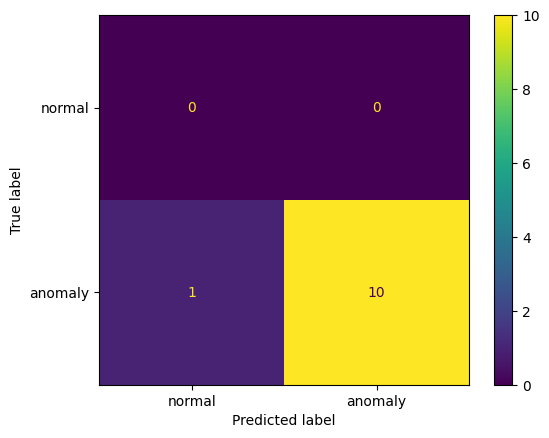

In [19]:
### Evaluation metrics

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, average_precision_score, ConfusionMatrixDisplay


# Calculate precision
precision = precision_score(y_true_all, y_pred_all)
print(f'Precision: {precision:.4f}')

# Calculate recall
recall = recall_score(y_true_all, y_pred_all)
print(f'Recall: {recall:.4f}')

# # Calculate average precision
# average_precision = average_precision_score(y_true_all, y_pred_all)
# print(f'Average Precision: {average_precision:.4f}')

# Calculate F1 score
f1 = f1_score(y_true_all, y_pred_all)
print(f"F1 Score: {f1:.4f}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true_all, y_pred_all)
print("Confusion Matrix:")
print(conf_matrix)
if len(conf_matrix) == 1:
    conf_matrix = np.array([[0, 0], [0, conf_matrix[0][0]]])
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['normal', 'anomaly'])
disp.plot()

## Classwise Detections

In [20]:
all_fn

[('../trace_data/lora_ducy/single_thread/version_3/faulty_data/trace_trial1',
  [],
  '../trace_data/lora_ducy/single_thread/version_3/faulty_data/labels/trace_trial1_labels.json'),
 ('../trace_data/lora_ducy/single_thread/version_3/faulty_data/trace_trial2',
  [[252, 262, 21320, 40958, 5]],
  '../trace_data/lora_ducy/single_thread/version_3/faulty_data/labels/trace_trial2_labels.json'),
 ('../trace_data/lora_ducy/single_thread/version_3/faulty_data/trace_trial3',
  [],
  '../trace_data/lora_ducy/single_thread/version_3/faulty_data/labels/trace_trial3_labels.json')]

In [21]:
all_gt

[('../trace_data/lora_ducy/single_thread/version_3/faulty_data/trace_trial1',
  [[745, 785, 318453, 359472, 5],
   [955, 975, 378328, 399471, 5],
   [1195, 1205, 458239, 478436, 5],
   [1392, 1405, 516972, 519467, 5],
   [1597, 1605, 556293, 575932, 5]],
  '../trace_data/lora_ducy/single_thread/version_3/faulty_data/labels/trace_trial1_labels.json'),
 ('../trace_data/lora_ducy/single_thread/version_3/faulty_data/trace_trial2',
  [[252, 262, 21320, 40958, 5],
   [702, 712, 260252, 280452, 5],
   [1182, 1192, 437340, 458462, 5]],
  '../trace_data/lora_ducy/single_thread/version_3/faulty_data/labels/trace_trial2_labels.json'),
 ('../trace_data/lora_ducy/single_thread/version_3/faulty_data/trace_trial3',
  [[434, 454, 81248, 101440, 5],
   [654, 674, 159332, 178973, 5],
   [1114, 1134, 319304, 338317, 5],
   [1594, 1614, 497307, 517240, 5]],
  '../trace_data/lora_ducy/single_thread/version_3/faulty_data/labels/trace_trial3_labels.json')]

In [22]:
classwise_fn = defaultdict(list)
classwise_tp = defaultdict(list)
gt_len = 0
for file_fn, file_gt in zip(all_fn, all_gt):
    fn = file_fn[1]
    gt = file_gt[1]
    for label in gt:
        if label in fn:
            classwise_fn[label[4]].append(label)
        else:
            classwise_tp[label[4]].append(label)
            # print('tp:', label)

    gt_len += len(gt)
    # print('file gt:', len(gt))
    # print('file fn:', len(fn))
    # print('\n')
    # break

total_fn = 0
total_tp = 0
keys = set(list(classwise_fn.keys()) + list(classwise_tp.keys()))
# print('keys:', keys)
for key in keys:
    print('class:', key)
    total_fn += len(classwise_fn[key])
    total_tp += len(classwise_tp[key])

    # print('not detected:', len(classwise_fn[key]))
    print('detected:', len(classwise_tp[key]))
    print('total anomalies:', len(classwise_fn[key])+len(classwise_tp[key]))
    print('\n')


# print('total fn+tp:', total_fn+total_tp)
# print('total gt:', gt_len)
assert total_fn+total_tp == gt_len, 'total fn+tp not equal to total gt'

class: 5
detected: 11
total anomalies: 12




## Save Detections

In [23]:
######## save detections for the dashboard to plot #############
import traceback

for test_data, detections, test_label in all_detections:
    # print(test_data, test_label)
    # print(test_label.replace('labels', 'detections'))
    detection_path = test_label.replace('labels', f'ei_detections')
    detection_path = detection_path.replace('ei_detections.json', f'ei_detections_{DIFF_VAL}.json')
    # tp_detection_path = detection_path.replace('ei_detections.json', f'tp_ei_detections_{DIFF_VAL}.json')
    # fp_detection_path = detection_path.replace('ei_detections.json', f'fp_ei_detections_{DIFF_VAL}.json')
    # print(detections)
    # print(detection_path)

    detection_dir = os.path.dirname(detection_path)
    # print(detection_dir)
    if not os.path.exists(detection_dir):
        os.makedirs(detection_dir)
        print(f'Created Directory: {detection_dir}')

    try:
        with open(detection_path, 'w') as f:
            json.dump(detections, f)
            print(f'Saved detections in {detection_path}')

            
    except Exception as e:
        traceback.print_exception(e)
        print('Error in saving detections')
        continue

for test_data, detections, test_label in all_tp:
    # print(test_data, test_label)
    # print(test_label.replace('labels', 'detections'))
    detection_path = test_label.replace('labels', 'ei_detections')
    tp_detection_path = detection_path.replace('ei_detections.json', f'tp_ei_detections_{DIFF_VAL}.json')
    # fp_detection_path = detection_path.replace('ei_detections.json', 'fp_ei_detections.json')
    # print(detections)

    detection_dir = os.path.dirname(detection_path)
    # print(detection_dir)
    if not os.path.exists(detection_dir):
        os.makedirs(detection_dir)
        print(f'Created Directory: {detection_dir}')

    try:

        with open(tp_detection_path, 'w') as f:
            json.dump(detections, f)
            print(f'Saved detections in {tp_detection_path}')
            
    except Exception as e:
        traceback.print_exception(e)
        print('Error in saving detections')
        continue

for test_data, detections, test_label in all_fp:
    # print(test_data, test_label)
    # print(test_label.replace('labels', 'detections'))
    detection_path = test_label.replace('labels', 'ei_detections')
    # tp_detection_path = detection_path.replace('ei_detections.json', 'tp_ei_detections.json')
    fp_detection_path = detection_path.replace('ei_detections.json', f'fp_ei_detections_{DIFF_VAL}.json')
    # print(detections)

    detection_dir = os.path.dirname(detection_path)
    # print(detection_dir)
    if not os.path.exists(detection_dir):
        os.makedirs(detection_dir)
        print(f'Created Directory: {detection_dir}')

    try:

        with open(fp_detection_path, 'w') as f:
            json.dump(detections, f)
            print(f'Saved detections in {fp_detection_path}')
            
    except Exception as e:
        traceback.print_exception(e)
        print('Error in saving detections')
        continue

Saved detections in ../trace_data/lora_ducy/single_thread/version_3/faulty_data/ei_detections/trace_trial1_ei_detections_5.json
Saved detections in ../trace_data/lora_ducy/single_thread/version_3/faulty_data/ei_detections/trace_trial2_ei_detections_5.json
Saved detections in ../trace_data/lora_ducy/single_thread/version_3/faulty_data/ei_detections/trace_trial3_ei_detections_5.json
Saved detections in ../trace_data/lora_ducy/single_thread/version_3/faulty_data/ei_detections/trace_trial1_tp_ei_detections_5.json
Saved detections in ../trace_data/lora_ducy/single_thread/version_3/faulty_data/ei_detections/trace_trial2_tp_ei_detections_5.json
Saved detections in ../trace_data/lora_ducy/single_thread/version_3/faulty_data/ei_detections/trace_trial3_tp_ei_detections_5.json
Saved detections in ../trace_data/lora_ducy/single_thread/version_3/faulty_data/ei_detections/trace_trial1_fp_ei_detections_5.json
Saved detections in ../trace_data/lora_ducy/single_thread/version_3/faulty_data/ei_detection

In [24]:
# print('Total Detections:', len(all_detections[1][1]))
# print('Total Groups:', len(all_group_detections[1][1]))
# i=0
# for item in all_group_detections[1][1]:
#     for ind_item in item:
#         i+=1
# print('Detections in Groups:', i)
# print('Total Merged:', len(all_merged_detections[1][1]))

## Plot Detections

In [25]:
# ### plot gt and detections
# for test_data, detections, test_label in all_detections:
# # for test_data, detections, test_label in all_fp:
#     # print('test_data:', test_data)
#     # print('detections:', detections)
#     # print(test_label)

#     ### prepare trace to plot
#     col_data = preprocess_traces([test_data])
#     all_df = get_dataframe(col_data) 
#     # print(all_df[0])

#     ### prepare detections to plot
#     timestamps = col_data[0][1]
#     print('timestamps:', timestamps)
#     plot_val = []
#     plot_x_ticks = []
#     plot_class = []
#     for det in detections:
#         # print(det)
#         det_ts1, det_ts2 = det[1]
#         # print(det_ts1, det_ts2)

#         det_ind1_pre = [ abs(t-det_ts1) for t in timestamps]
#         det_ind1 = det_ind1_pre.index(min(det_ind1_pre))

#         det_ind2_pre = [ abs(t-det_ts2) for t in timestamps]
#         det_ind2 = det_ind2_pre.index(min(det_ind2_pre))
#         # print(det_ind1, det_ind2)
#         # print(timestamps[det_ind1], timestamps[det_ind2])

#         plot_val += [(det_ind1, det_ind2)]
#         plot_x_ticks += [(timestamps[det_ind1], timestamps[det_ind2])]
#         plot_class += [0]

#     plot_detections = [plot_val, plot_x_ticks, plot_class]

#     ### get ground truths
#     gt_plot = prepare_gt(test_label)

#     ### plot
#     for df in all_df:
#         # print(df.columns)
#         plot_fig = plot_single_trace(df, 
#                           var_list, 
#                           with_time=False, 
#                           is_xticks=True, 
#                           detections=plot_detections, 
#                           dt_classlist=['detection'],
#                           ground_truths=gt_plot,
#                           gt_classlist=['gt_communication', 'gt_sensor', 'gt_bitflip'],
#                           )
#         plot_fig.show()

#     # break

In [26]:
# ##### plot merged detections
# ### plot gt and detections
# # for test_data, detections, test_label in all_detections:
# # for test_data, detections, test_label in all_merged_detections: #### all merged detections
# for test_data, detections, test_label in all_fp:
#     # print('test_data:', test_data)
#     # print('detections:', detections)
#     # print(test_label)

#     ### prepare trace to plot
#     col_data = preprocess_traces([test_data])
#     all_df = get_dataframe(col_data) 
#     # print(all_df[0])

#     ### prepare detections to plot
#     timestamps = col_data[0][1]
#     print('timestamps:', timestamps)
#     plot_val = []
#     plot_x_ticks = []
#     plot_class = []
#     for det in detections:
#         # print(det)
#         det_ts1, det_ts2 = det[1]
#         # print(det_ts1, det_ts2)

#         det_ind1_pre = [ abs(t-det_ts1) for t in timestamps]
#         det_ind1 = det_ind1_pre.index(min(det_ind1_pre))

#         det_ind2_pre = [ abs(t-det_ts2) for t in timestamps]
#         det_ind2 = det_ind2_pre.index(min(det_ind2_pre))
#         # print(det_ind1, det_ind2)
#         # print(timestamps[det_ind1], timestamps[det_ind2])

#         plot_val += [(det_ind1, det_ind2)]
#         plot_x_ticks += [(timestamps[det_ind1], timestamps[det_ind2])]
#         plot_class += [0]

#     plot_detections = [plot_val, plot_x_ticks, plot_class]

#     ### get ground truths
#     gt_plot = prepare_gt(test_label)

#     ### plot
#     for df in all_df:
#         # print(df.columns)
#         plot_fig = plot_single_trace(df, 
#                           var_list, 
#                           with_time=False, 
#                           is_xticks=True, 
#                           detections=plot_detections, 
#                           dt_classlist=['detection'],
#                           ground_truths=gt_plot,
#                           gt_classlist=['gt_communication', 'gt_sensor', 'gt_bitflip'],
#                           )
#         plot_fig.show()

#     # break

In [27]:
1890

1890

Observations
---
- since multiple variables are affected due to single anomaly, multiple detections are generated for each anomaly.
- This leads to multiple FP.
- To avoid this, we implement deduplication which groups the detections that are close to each other bsed on timestamp
- However, in this process along with decrease in FP, we have more False Negatives i.e. some anomalies are not detected. 

TODO:
- change deduplication stratergy, if possible